# Descriptive Analyst


Get data from mysql

In [5]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('mysql+pymysql://root:@localhost:3306/housedb')
query = 'select * from house'
df = pd.read_sql(query, con=engine)


pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format

df.head(3)

,description,price,buildingArea,landArea,bedroom,bathroom,garage
0,"rumah murah hook tebet timur, tebet, jakarta selatan","3,800,000,000.00",220.00,220.00,3,3,0
1,"rumah modern di tebet dekat stasiun, tebet, jakarta selatan","4,600,000,000.00",180.00,137.00,4,3,2
2,"rumah mewah 2 lantai hanya 3 menit ke tebet, tebet, jakarta selatan","3,000,000,000.00",267.00,250.00,4,4,4


Get data from excel file

In [4]:
import pandas as pd

dataset = pd.read_excel('dataset/house_clean.xlsx')


pd.set_option('display.max_colwidth', None)
dataset.head()

,description,price,buildingArea,landArea,bedroom,bathroom,garage
0,"rumah murah hook tebet timur, tebet, jakarta selatan",3800000000,220,220,3,3,0
1,"rumah modern di tebet dekat stasiun, tebet, jakarta selatan",4600000000,180,137,4,3,2
2,"rumah mewah 2 lantai hanya 3 menit ke tebet, tebet, jakarta selatan",3000000000,267,250,4,4,4
3,"rumah baru tebet, tebet, jakarta selatan",430000000,40,25,2,2,0
4,"rumah bagus tebet komp gudang peluru lt 350m, tebet, jakarta selatan",9000000000,400,355,6,5,3


## Describe data

In [3]:
df_describe = df[['buildingArea', 'landArea', 'bedroom', 'bathroom', 'garage', 'price']].describe()

df_describe

,buildingArea,landArea,bedroom,bathroom,garage,price
count,"1,008.00","1,008.00","1,008.00","1,008.00","1,008.00","1,008.00"
mean,276.75,237.53,4.67,3.61,1.92,"7,636,187,390.08"
std,177.97,180.11,1.57,1.42,1.51,"7,346,448,594.96"
min,40.00,25.00,2.00,1.00,0.00,"430,000,000.00"
25%,150.00,130.00,4.00,3.00,1.00,"3,250,000,000.00"
50%,217.50,165.00,4.00,3.00,2.00,"5,000,000,000.00"
75%,350.00,292.50,5.00,4.00,2.00,"9,000,000,000.00"
max,"1,126.00","1,400.00",10.00,10.00,10.00,"65,000,000,000.00"


## Distribute

In [28]:
distribute = df['price'].value_counts().reset_index(name='count')
distribute.sort_values(by= 'count', ascending=False).head()

,price,count
0,"3,500,000,000.00",50
2,"6,500,000,000.00",30
1,"3,000,000,000.00",30
3,"4,000,000,000.00",29
4,"5,500,000,000.00",25


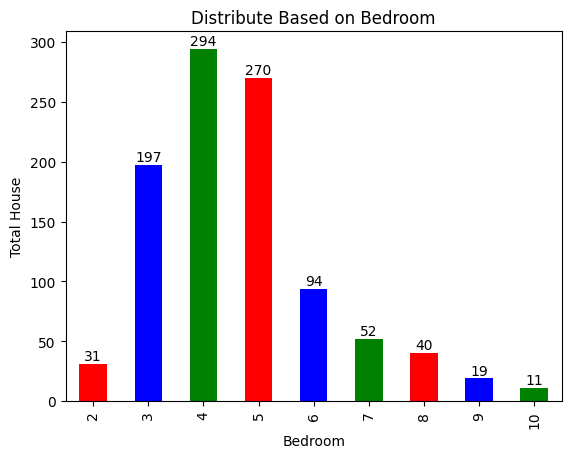

In [18]:
import matplotlib.pyplot as plt

bedroom_count = df['bedroom'].value_counts().sort_index()

colors = ['red', 'blue', 'green']
ax = bedroom_count.plot(kind='bar', color=colors)
plt.title('Distribute Based on Bedroom')
plt.xlabel('Bedroom')
plt.ylabel('Total House')


for i, value in enumerate(bedroom_count):
    plt.text(i, value + 0.5, str(value), ha='center', va = 'bottom')
plt.show()

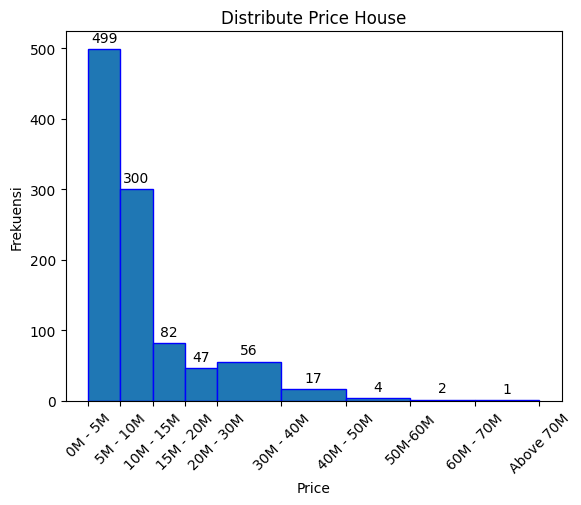

In [41]:
# Histogram of price distribute
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(df['price'], bins=[0,  5000000000, 10000000000, 15000000000, 20000000000, 30000000000, 40000000000, 50000000000, 60000000000,70000000000], edgecolor='blue')

plt.title('Distribute Price House')
plt.xlabel('Price')
plt.ylabel('Frekuensi')

plt.xticks([0, 5000000000, 10000000000, 15000000000, 20000000000, 30000000000, 40000000000, 50000000000, 60000000000, 70000000000],
           ['0M - 5M', '5M - 10M', '10M - 15M', '15M - 20M', '20M - 30M', '30M - 40M', '40M - 50M', '50M-60M', '60M - 70M', 'Above 70M'], )
plt.xticks(rotation=45)

for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1] - bins[i])/2, n[i] + 10, str(int(n[i])), ha='center')


plt.show()

## Filtering

Filtering price betwees 0 - 1000000000

In [40]:
df_bedroom = df[(df['price'] >= 0) & (df['price'] <= 1000000000) ]
df_bedroom.sort_values(by='price', ascending=True).head()

,description,price,buildingArea,landArea,bedroom,bathroom,garage
3,"rumah baru tebet, tebet, jakarta selatan","430,000,000.00",40.00,25.00,2,2,0
679,rumah murah 2 lantai tebet,"600,000,000.00",60.00,30.00,2,1,0
1002,rumah 2lantai akses 2mobil di bukit duri tebet jaksel,"600,000,000.00",60.00,30.00,2,2,0
920,rumah seken di asem baris dekat st. cawang,"650,000,000.00",50.00,55.00,2,1,0
204,rumah murah siap huni di jl. palbatu iii tebet,"690,000,000.00",90.00,50.00,3,1,0


Dercribe price of house with 2 bedroom

In [37]:
df_badroom_mean = df.groupby('bedroom')['price'].mean()
print(f'average price 2 bedroom: {df_badroom_mean[2]:,.2f}')

max_per_bed = df.groupby('bedroom')['price'].max()
print(f"Max price 2 bedroom: {max_per_bed[2]}")

min_per_bed = df.groupby('bedroom')['price'].min()
print(f'Min price 2 Bedroom: {min_per_bed[2]}')


average price 2 bedroom: 2,043,978,483.87
Max price 2 bedroom: 5000000000.0
Min price 2 Bedroom: 430000000.0
